In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import sys
!{sys.executable} -m pip install keras-resnet

In [3]:
import os
import sys
from glob import glob

from multiprocessing import Pool
import numpy as np
import scipy.misc

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

sys.path.append('../models/keras-rcnn/')
import keras_rcnn.datasets.malaria_phenotypes
import keras_rcnn.preprocessing
import keras_rcnn.models
import keras

/home/race/tensorflow3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Set some parameters
IMG_CHANNELS = 3
DATA = {
    'TRAIN': '../data/train/',
    'TEST': '../data/test/'
}

BATCH_SIZE = 16
SIDE = 256
np.random.seed = 42
SPLIT = .9

In [5]:
train_paths = glob(os.path.join(DATA['TRAIN'], '*'))
test_paths = glob(os.path.join(DATA['TEST'], '*'))

In [6]:
training, validation, test = keras_rcnn.datasets.malaria_phenotypes.load_data()

for item in training:
    for el in item['boxes']:
        el['class'] = 'rbc'
        
for item in validation:
    for el in item['boxes']:
        el['class'] = 'rbc'
        
for item in test:
    for el in item['boxes']:
        el['class'] = 'rbc'

classes = {
    "rbc": 1
}

generator = keras_rcnn.preprocessing.ObjectDetectionGenerator()
generator = generator.flow(training, classes, batch_size=1)

validation_data = keras_rcnn.preprocessing.ObjectDetectionGenerator()
validation_data = validation_data.flow(validation, classes)

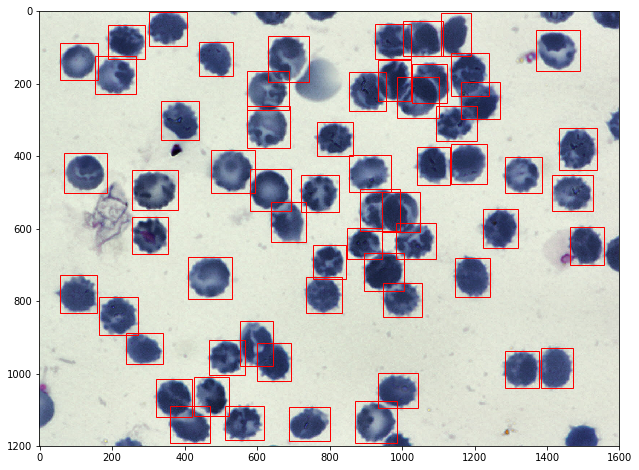

In [7]:
(target_bounding_boxes, target_image, target_scores, _), _ = generator.next()

target_bounding_boxes = np.squeeze(target_bounding_boxes)

target_image = np.squeeze(target_image)

target_scores = np.argmax(target_scores, -1)
target_scores = np.squeeze(target_scores)

_, axis = matplotlib.pyplot.subplots(1, figsize=(12, 8))

axis.imshow(target_image)

for target_index, target_score in enumerate(target_scores):
    if target_score > 0:
        xy = [
            target_bounding_boxes[target_index][0],
            target_bounding_boxes[target_index][1]
        ]

        w = target_bounding_boxes[target_index][2] - target_bounding_boxes[target_index][0]
        h = target_bounding_boxes[target_index][3] - target_bounding_boxes[target_index][1]

        rectangle = matplotlib.patches.Rectangle(xy, w, h, edgecolor="r", facecolor="none")

        axis.add_patch(rectangle)

matplotlib.pyplot.show()

In [183]:
image = keras.layers.Input((None, None, 3))

model = keras_rcnn.models.RCNN(image, classes=len(classes) + 1)

In [184]:
training[2]

{'boxes': [{'class': 'rbc', 'x1': 1027, 'x2': 1136, 'y1': 724, 'y2': 834},
  {'class': 'rbc', 'x1': 1155, 'x2': 1254, 'y1': 287, 'y2': 387},
  {'class': 'rbc', 'x1': 726, 'x2': 838, 'y1': 306, 'y2': 407},
  {'class': 'rbc', 'x1': 747, 'x2': 865, 'y1': 702, 'y2': 820},
  {'class': 'rbc', 'x1': 1355, 'x2': 1474, 'y1': 675, 'y2': 782},
  {'class': 'rbc', 'x1': 265, 'x2': 377, 'y1': 1013, 'y2': 1126},
  {'class': 'rbc', 'x1': 502, 'x2': 634, 'y1': 763, 'y2': 868},
  {'class': 'rbc', 'x1': 1173, 'x2': 1290, 'y1': 480, 'y2': 586},
  {'class': 'rbc', 'x1': 345, 'x2': 474, 'y1': 83, 'y2': 213},
  {'class': 'rbc', 'x1': 915, 'x2': 1029, 'y1': 627, 'y2': 715},
  {'class': 'rbc', 'x1': 898, 'x2': 1010, 'y1': 733, 'y2': 860},
  {'class': 'rbc', 'x1': 749, 'x2': 862, 'y1': 869, 'y2': 986},
  {'class': 'rbc', 'x1': 1269, 'x2': 1395, 'y1': 819, 'y2': 934},
  {'class': 'rbc', 'x1': 28, 'x2': 151, 'y1': 217, 'y2': 338},
  {'class': 'rbc', 'x1': 215, 'x2': 337, 'y1': 408, 'y2': 524},
  {'class': 'rbc', 

In [185]:
optimizer = keras.optimizers.Adam(0.0001)

model.compile(optimizer)

In [186]:
model.fit_generator(
    generator, 
    len(training), 
    validation_data=validation_data, 
    validation_steps=len(validation),
    epochs=30
)

Epoch 1/30
791/791 [==============================] - 623s 788ms/step - loss: 0.8955 - val_loss: 0.6499
Epoch 2/30
791/791 [==============================] - 624s 789ms/step - loss: 0.4127 - val_loss: 0.3764
Epoch 3/30
791/791 [==============================] - 624s 789ms/step - loss: 0.3305 - val_loss: 0.2970
Epoch 4/30
791/791 [==============================] - 625s 791ms/step - loss: 0.2933 - val_loss: 0.2661
Epoch 5/30
176/791 [=====>........................] - ETA: 6:26 - loss: 0.2622

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



791/791 [==============================] - 623s 788ms/step - loss: 0.2762 - val_loss: 0.3627
Epoch 13/30
 60/791 [=>............................] - ETA: 7:44 - loss: 0.2508

KeyboardInterrupt: 

In [187]:
validation_data = keras_rcnn.preprocessing.ObjectDetectionGenerator()
validation_data = validation_data.flow(validation, classes, shuffle=False)

pred = model.predict_generator(validation_data, len(validation))

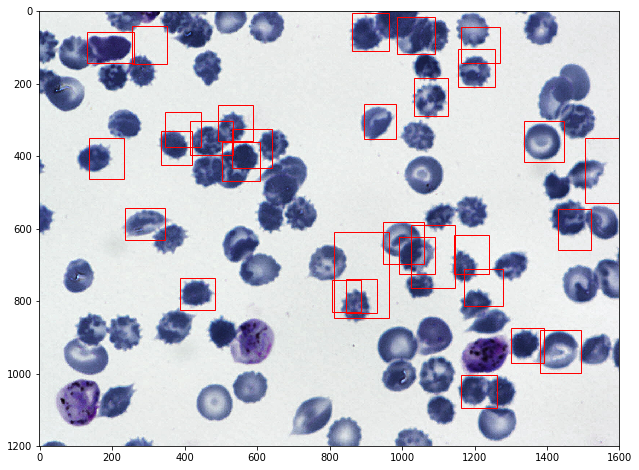

In [189]:
validation_data = keras_rcnn.preprocessing.ObjectDetectionGenerator()
validation_data = validation_data.flow(validation, classes, shuffle=False)

(target_bounding_boxes, target_image, target_scores, _), _ = validation_data.next()
(target_bounding_boxes, target_image, target_scores, _), _ = validation_data.next()

target_bounding_boxes = np.squeeze(target_bounding_boxes)

target_image = np.squeeze(target_image)

target_scores = np.argmax(target_scores, -1)
target_scores = np.squeeze(target_scores)

_, axis = matplotlib.pyplot.subplots(1, figsize=(12, 8))

axis.imshow(target_image)

target_bounding_boxes = pred[0][1]

for target_index, el in enumerate(target_bounding_boxes):
    xy = [
        target_bounding_boxes[target_index][0],
        target_bounding_boxes[target_index][1]
    ]

    w = target_bounding_boxes[target_index][2] - target_bounding_boxes[target_index][0]
    h = target_bounding_boxes[target_index][3] - target_bounding_boxes[target_index][1]

    rectangle = matplotlib.patches.Rectangle(xy, w, h, edgecolor="r", facecolor="none")

    axis.add_patch(rectangle)

matplotlib.pyplot.show()

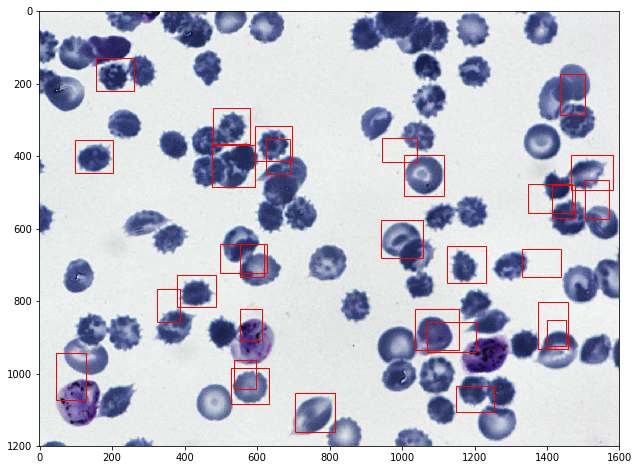

In [141]:
validation_data = keras_rcnn.preprocessing.ObjectDetectionGenerator()
validation_data = validation_data.flow(validation, classes, shuffle=False)

(target_bounding_boxes, target_image, target_scores, _), _ = validation_data.next()
(target_bounding_boxes, target_image, target_scores, _), _ = validation_data.next()

target_bounding_boxes = np.squeeze(target_bounding_boxes)

target_image = np.squeeze(target_image)

target_scores = np.argmax(target_scores, -1)
target_scores = np.squeeze(target_scores)

_, axis = matplotlib.pyplot.subplots(1, figsize=(12, 8))

axis.imshow(target_image)

target_bounding_boxes = pred[0][1]

for target_index, el in enumerate(target_bounding_boxes):
    xy = [
        target_bounding_boxes[target_index][0],
        target_bounding_boxes[target_index][1]
    ]

    w = target_bounding_boxes[target_index][2] - target_bounding_boxes[target_index][0]
    h = target_bounding_boxes[target_index][3] - target_bounding_boxes[target_index][1]

    rectangle = matplotlib.patches.Rectangle(xy, w, h, edgecolor="r", facecolor="none")

    axis.add_patch(rectangle)

matplotlib.pyplot.show()

In [102]:
len(validation)

417

In [190]:
pred[0][300].sum(1)

array([1066.5668, 1722.7465, 2927.8018, 3537.6572, 4112.628 , 4494.4976,
       2657.3167, 3157.5881, 1076.3252, 2463.421 ,  849.6141, 3234.65  ,
       4210.7896, 3297.3828, 3807.5671, 3958.5005, 3874.4265, 1934.3569,
       2257.765 , 2170.3877,  710.4568, 1475.6754, 2968.8433, 4052.7104,
       2030.0764, 2736.4602, 3539.7383, 3725.2976, 2997.3232, 3446.359 ,
       2507.1328,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    , 

In [ ]:
# std_paths = list()
# for n, path in tqdm(enumerate(train_paths), total=len(train_paths)):
#     img = imread(os.path.join(path, 'images', os.path.basename(path) + '.png'))[..., :IMG_CHANNELS]
#     mask = list()
#     for mask_file in next(os.walk(path + '/masks/'))[2]:
#         mask.append(imread(path + '/masks/' + mask_file))
#     std_paths.append((path, img.std(-1).sum(), len(mask)))
#     mask = np.array(mask).max(0)
#     np.save(path + '/mask', mask)


# std_paths = list()
# for n, path in tqdm(enumerate(test_paths), total=len(test_paths)):
#     img = scipy.misc.imread(os.path.join(path, 'images', os.path.basename(path) + '.png'))[..., :IMG_CHANNELS]
#     std_paths.append((path, img.std(-1).sum()))
    
    
# Get and resize test images
sizes_test = dict()
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, path in tqdm(enumerate(test_paths), total=len(test_paths)):
    img = scipy.misc.imread(os.path.join(path, 'images', os.path.basename(path) + '.png'))[..., :IMG_CHANNELS]
    sizes_test[path] = ([img.shape[0], img.shape[1]])